In [183]:
#SETUP

#import
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import earthpy as et

#styling
sns.set_style("white")
sns.set(font_scale=1.5)

#get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [184]:
#MAPPING

#import data
roads_path = os.path.join(
    "data",
    "spatial-vector-lidar",
    "california",
    "madera-county-roads",
    "tl_2013_06039_roads.shp",
)
roads = gpd.read_file(roads_path)

#set up area of interest
aoi_path = os.path.join(
    "data",
    "spatial-vector-lidar",
    "california",
    "neon-sjer-site",
    "vector_data",
    "SJER_crop.shp"
)
aoi = gpd.read_file(aoi_path)

#view crs of both layers
print(roads.crs)
print(aoi.crs)
print("Notice that they are different CRS")


epsg:4269
epsg:32611
Notice that they are different CRS


In [185]:
#REPROJECT

aoi_fix = aoi.to_crs(epsg=4269)

Text(0.5, 1.0, 'Madera County Roads with SJER AOI')

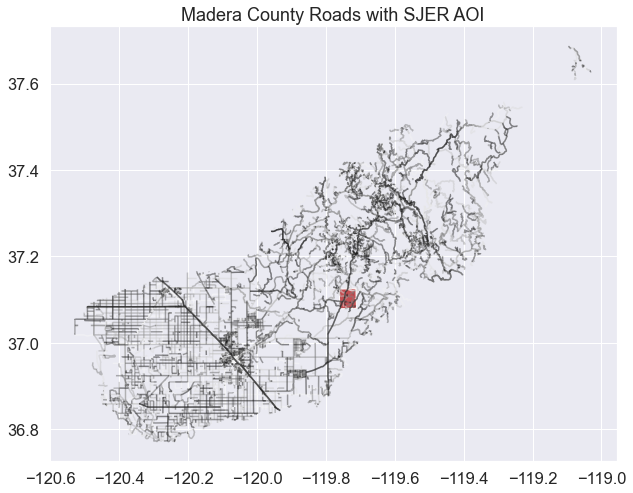

In [186]:
#PLOT AND PROJECT

fig,ax = plt.subplots(figsize=(12,8))

roads.plot(
    cmap= 'Greys',
    ax = ax,
    alpha = .5
)
aoi_fix.plot(
    ax = ax,
    markersize = 10,
    color = 'r'
)

ax.set_title("Madera County Roads with SJER AOI")



Text(0.5, 1.0, 'Madera County Roads with SJER AOI')

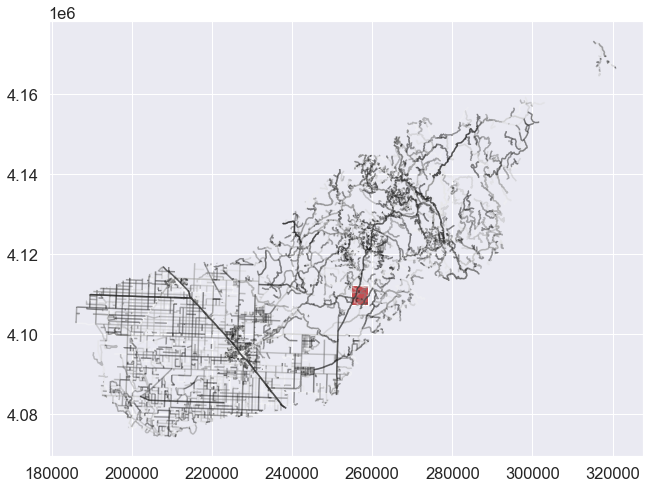

In [187]:
#APPLYING FIX TO THE ROADS CRS

roads_fix = roads.to_crs(epsg=32611)

fig2, ax2 = plt.subplots(figsize=(12,8))

roads_fix.plot(
    cmap = 'Greys',
    ax = ax2,
    alpha = .5
)
aoi.plot(
    ax = ax2,
    markersize = 10,
    color = 'r'
)

ax.set_title("Madera County Roads with SJER AOI")


In [188]:
# BOUNDARY SETUP

boundary_path = os.path.join(
    "data",
    "spatial-vector-lidar",
    "usa",
    "usa-states-census-2014.shp"
)
boundary = gpd.read_file(boundary_path)

boundary.head()


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


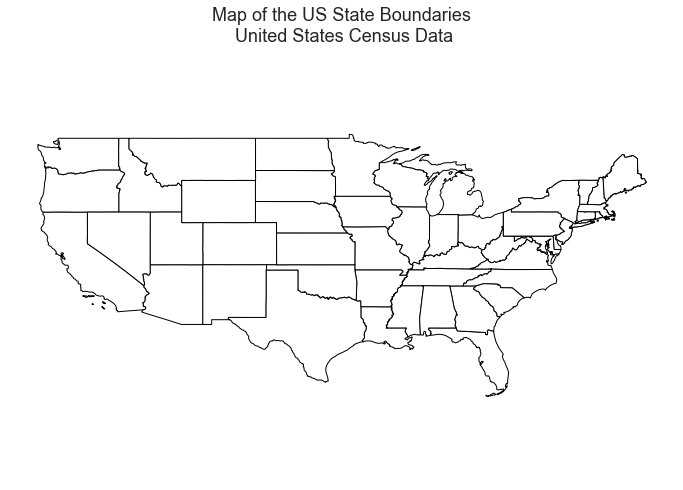

In [189]:
#PLOT

fig,ax = plt.subplots(figsize = (12,8))

boundary.plot(
    ax = ax,
    facecolor = 'white',
    edgecolor = 'black',
)

ax.set(title = "Map of the US State Boundaries\n United States Census Data")

plt.axis('equal')
ax.set_axis_off()

plt.show()



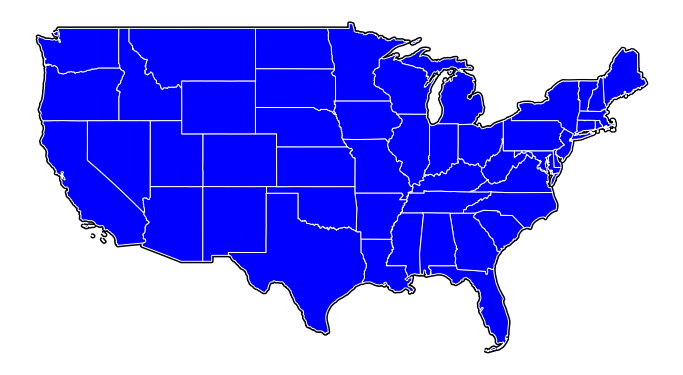

In [190]:
#ADD COUNTRY BOUNDARY LAYER

#import data
us_path = os.path.join(
    "data",
    "spatial-vector-lidar",
    "usa",
    "usa-boundary-dissolved.shp"
)
us = gpd.read_file(us_path)

#plot data
fig, ax = plt.subplots(figsize = (12,7))
us.plot(
    ax = ax,
    edgecolor = "black",
    color = "white",
    linewidth = 4
)
boundary.plot(
    ax = ax,
    color = 'blue',
    edgecolor = "white",
    linewidth = 1
)

ax.set_axis_off()
plt.show()

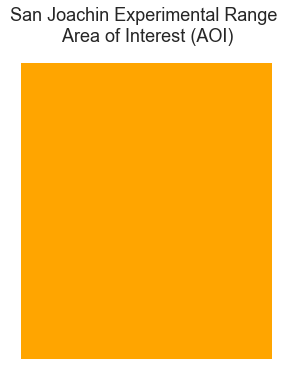

In [191]:
#ADD AREA OF INTEREST

fig,ax = plt.subplots(figsize = (6,6))

aoi.plot(
    ax = ax,
    color = 'orange'
)
ax.set(title = "San Joachin Experimental Range \n Area of Interest (AOI)")

ax.set_axis_off()
plt.show()

In [192]:
#COMPARING CRS

print(aoi.crs)
print(us.crs)
print(boundary.crs)

print(aoi.total_bounds)
print(boundary.total_bounds)
print(us.total_bounds)

epsg:32611
epsg:4326
epsg:4326
[ 254570.567      4107303.07684455  258867.40933092 4112361.92026107]
[-124.725839   24.498131  -66.949895   49.384358]
[-124.725839   24.498131  -66.949895   49.384358]


In [193]:
#PRINT WITH MODIFIED CRS

aoi_fix = aoi.to_crs(boundary.crs)

print(aoi_fix.crs)
print(us.crs)
print(boundary.crs)

print(aoi_fix.total_bounds)
print(boundary.total_bounds)
print(us.total_bounds)

epsg:4326
epsg:4326
epsg:4326
[-119.76262834   37.07990136 -119.71268568   37.12656698]
[-124.725839   24.498131  -66.949895   49.384358]
[-124.725839   24.498131  -66.949895   49.384358]


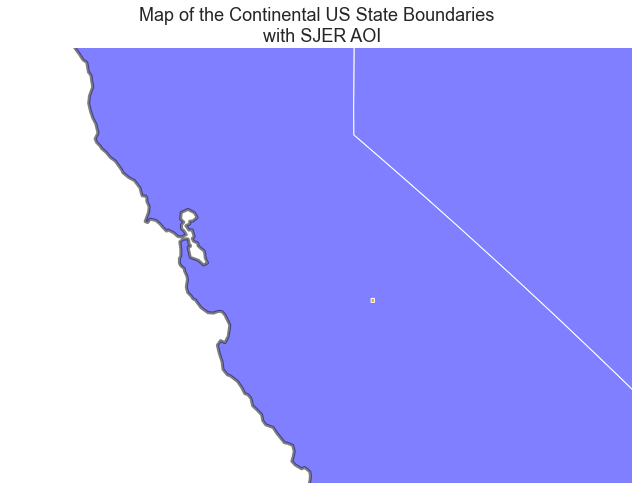

In [194]:
#PLOT

fig,ax = plt.subplots(figsize = (12,8))

boundary.plot(
    ax = ax,
    linewidth = 1,
    edgecolor = 'white',
    color = 'blue'
)
us.plot(
    ax = ax,
    alpha = .5,
    edgecolor = 'black',
    color = 'white',
    linewidth = 3
)
aoi_fix.plot(
    ax = ax,
    color = 'orange',
    edgecolor = 'white'
)

ax.set(title = "Map of the Continental US State Boundaries \n with SJER AOI")
ax.set(
    xlim=[-125,-116], 
    ylim=[35,40]
)

ax.set_axis_off()


C:\Users\kamna\AppData\Local\Temp\ipykernel_19340\2751616329.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  aoi_point = aoi_fix["geometry"].centroid;


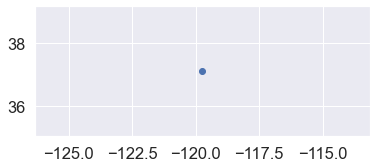

In [195]:
#CONVERT TO CENTROID AND POINT

aoi_point = aoi_fix["geometry"].centroid;
aoi_point.plot();


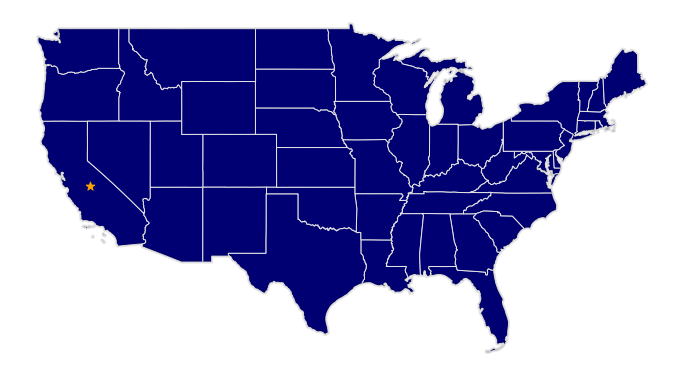

In [196]:
#FINAL PLOT

fig,ax = plt.subplots(figsize = (12,7))

boundary.plot(
    ax = ax,
    linewidth = 1,
    edgecolor = 'white',
    color = 'navy'
)
us.plot(
    ax = ax,
    alpha = .1,
    edgecolor = 'black',
    color = 'black',
    linewidth = 3
)
aoi_point.plot(
    ax = ax,
    markersize = 80,
    color = 'orange',
    marker = '*'
)

ax.set_axis_off();
plt.show()